# Easy use

This file allows you to use the entire software package yourself, with minimal programming!

First we convert the necessary data from the FEM simulation into a csv file (step 1).

Then we optimise it (step 2). You may want to slightly change the code in the step 2 box by putting it in a FOR loop so that it executes for many different numbers of sensors.

Every time you run the code from this file execute the box below. It sorts out some of the paths and some of the graphs.

In [1]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


## Step 1 - simulation to csv

Simulate the temperature field (it is **really** important that you call your variable 'temperature' - if you don't want to call it this see the 'complicated_use.ipynb' manual) for the experiment you want to optimise in MOOSE (I think any other well known FEM software will work as well - but I'm not 100% sure).

Copy the resulting exodus file into the simulation folder (I think that any other well known FEM output format will work as well - but again I'm not 100% sure).

Make the following changes to the snippet below:
1. Swap '*monoblock_out.e*' for the name of your simulation file
2. Swap 'generate_side()' for 'generate_front()', or write your own function to get a rectangular grid of values from the simulation file (if you are dealing with a curved surface you will need a clever coordinate system to flatten the curve out - I may or may not manage to provide an example of this)
3. Swap '*test.csv*' for the name of the csv file you want to output this grid to 

Run the code and this will produce a csv file (it will be stored in the simulation folder) corresponding to the face of the experiment you are interested in. The file will be stored in the 'simulation' folder. It will take around 30 seconds to run on a laptop. Once you have done this step once for your simulation file you will never need to do it again.


Reading mesh...
Generating node data...


100%|██████████| 20/20 [00:07<00:00,  2.52it/s]


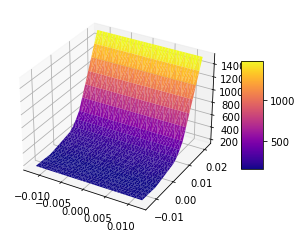


          X         Y            T
0    0.000 -0.013500   170.432083
1    0.000 -0.011658   169.781467
2    0.000 -0.009816   167.891417
3    0.000 -0.007974   165.644285
4    0.000 -0.006132   160.884272
..     ...       ...          ...
775 -0.012  0.017816  1174.850795
776  0.012  0.019658  1353.773282
777 -0.012  0.019658  1353.773282
778  0.012  0.021500  1529.595222
779 -0.012  0.021500  1529.595222

[780 rows x 3 columns]


In [2]:
from exodus_reader import ExodusReader

exodus_reader = ExodusReader('monoblock_out.e')
pos, temps = exodus_reader.generate_side()
exodus_reader.plot_3D(pos[:,0], pos[:,1], temps)
exodus_reader.send_to_csv(pos[:,0], pos[:,1], temps, 'test.csv')

## Step 2 - optimise for a specific number of sensors

Make the following changes to the snippet below:
1. Change the '*test.csv*' to whatever you renamed it to in step 1
2. Change the UniformManager to a SymmetricManager depending on how you want to model the system (do you want to force uniformity in the horizontal direction, or force symmetry?)
3. Change the RBFModel to one of GPModel, RBFModel, CTModel, CSModel, or LSModel depending on which algorithm you want to reconstruct the temperature field 
>* GP is Gaussian Process Regression - only use it for 6 or more sensors
>* RBF is RBF interpolation
>* CT is Clough Tocker interpolation - only use it with the symmetric manager
>* CS is Cubic Spline interpolation - only use it with the uniform manager
>* LS is least squares cubic fit - only use it with the uniform manager
4. Change the num_sensors parameter to whatever number of sensors you want to optimise for
5. Change the time_limit to how long you want to optimise for
6. Change the 'Test: ' to whatever you want to rename the start of the pdf of each Pareto optimal point

Run the code and this will optimise for accuracy and reliability. It will then take ages (maybe 10 on a laptop - but this time depends on how many Pareto optimal points were found) to save all of the pdfs of the Pareto optimal layouts into the results folder. When doing this it will print lots of strings looking like OOXOX. This means that it is drawing the graphs for when the sensors in positions 2 and 4 fail.


Optimising...
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      3 |             - |             -
     2 |       50 |      3 |  0.0005566478 |             f
     3 |       60 |      3 |  0.0005566478 |             f
     4 |       70 |      3 |  0.0005566478 |             f
     5 |       80 |      4 |  0.0749078965 |             f
     6 |       90 |      4 |  0.0035151286 |         ideal
     7 |      100 |      4 |  0.0641711230 |         ideal
     8 |      110 |      4 |  0.000000E+00 |             f
     9 |      120 |      4 |  0.000000E+00 |             f
    10 |      130 |      4 |  0.000000E+00 |             f
    11 |      140 |      4 |  0.0004252274 |             f
    12 |      150 |      4 |  0.0004252274 |             f
    13 |      160 |      4 |  0.0154000249 |         ideal

Result:
[[-0.00607197  0.01720607  0.00315323  0.00507122  0.01015058  0.00548755
   0.0006967  -0.01013461  0.00102056  0.01120301 -0.00289513  0.00921944]
 

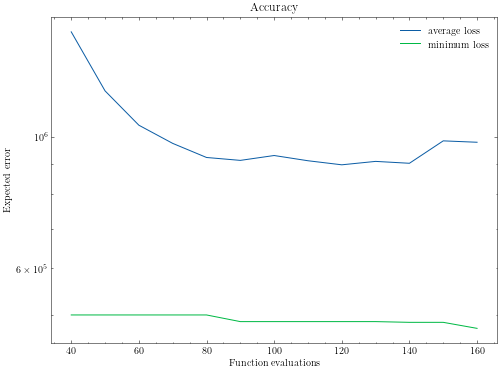

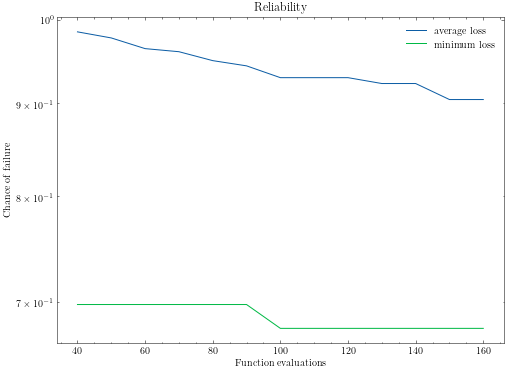

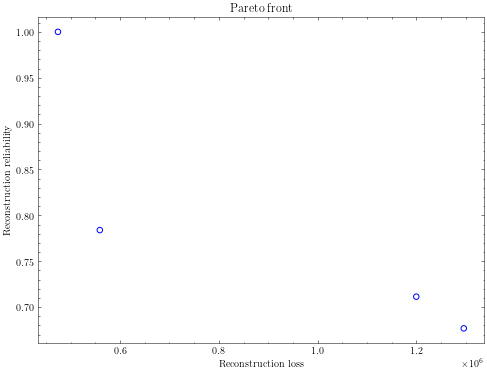


Describing temperature fields...
OOOOOO
XOOOOO
XXOOOO
XOXOOO
XOOXOO
XOOOXO
XOOOOX
XXXOOO
XXOXOO
XXOOXO
XXOOOX
XOXXOO
XOXOXO
XOXOOX
XOOXXO
XOOXOX
XOOOXX
OXOOOO
OXXOOO
OXOXOO
OXOOXO
OXOOOX
OXXXOO
OXXOXO
OXXOOX
OXOXXO
OXOXOX
OXOOXX
OOXOOO
OOXXOO
OOXOXO
OOXOOX
OOXXXO
OOXXOX
OOXOXX
OOOXOO
OOOXXO
OOOXOX
OOOXXX
OOOOXO
OOOOXX
OOOOOX

Describing temperature fields...
OOOOOO
XOOOOO
XXOOOO
XOXOOO
XOOXOO
XOOOXO
XOOOOX
XXXOOO
XXOXOO
XXOOXO
XXOOOX
XOXXOO
XOXOXO
XOXOOX
XOOXXO
XOOXOX
XOOOXX
OXOOOO
OXXOOO
OXOXOO
OXOOXO
OXOOOX
OXXXOO
OXXOXO
OXXOOX
OXOXXO
OXOXOX
OXOOXX
OOXOOO
OOXXOO
OOXOXO
OOXOOX
OOXXXO
OOXXOX
OOXOXX
OOOXOO
OOOXXO
OOOXOX
OOOXXX
OOOOXO
OOOOXX
OOOOOX

Describing temperature fields...
OOOOOO
XOOOOO
XXOOOO
XOXOOO
XOOXOO
XOOOXO
XOOOOX
XXXOOO
XXOXOO
XXOOXO
XXOOOX
XOXXOO
XOXOXO
XOXOOX
XOOXXO
XOOXOX
XOOOXX
OXOOOO
OXXOOO
OXOXOO
OXOOXO
OXOOOX
OXXXOO
OXXOXO
OXXOOX
OXOXXO
OXOXOX
OXOOXX
OOXOOO
OOXXOO
OOXOXO
OOXOOX
OOXXXO
OOXXOX
OOXOXX
OOOXOO
OOOXXO
OOOXOX
OOOXXX
OOOOXO
OOOOXX
OOOOOX

Describing temp

In [2]:
from run_me import *

csv_reader = CSVReader('test.csv')
positions = csv_reader.get_positions()
true_temperatures = csv_reader.get_temperatures()

model_manager = UniformManager(RBFModel, csv_reader)
res = optimise_sensor_layout(model_manager, num_sensors=6, time_limit='00:00:20')
show_optimsiation(res)

for i, setup in enumerate(res.X):
    save_setup(model_manager, positions, true_temperatures, setup, 'Test: '+str(i)+'.pdf')

## What do the results mean?

The Pareto frontier shows the reliability and accuracy of each optimal sensor placement. Note that it is not a perfect curve as there is a certain ammount of randomness in the evaluation of the loss function. 

For each point in the Pareto frontier we produce a pdf report on that sensor setup. On the first page is a bar chart. The inside curve shows what percentage of the time the experiment is successful (the loss is below the LOSS_LIMIT of 1e6). The outside curve shows what percentage of the time various sensors fail.

The next pages show all of the possibilities where 3 or less sensors fail, and the field reconstruction. The sensors that fail are shown as a red star instead of a black circle.